In [9]:
file = "C:\\Users\\Maxwell\\Documents\\Code\\Python\\APS360\\src\\Labs\\Lab0\\train.csv"

import csv
with open(file) as csvfile:
    data_reader = csv.reader(csvfile)
    data_orig = []
    for row in data_reader:
        data_orig.append(row)

In [75]:
import numpy as np
data_numpy = np.array(data_orig)

In [83]:
sex_index = np.where(data_numpy[0,:] == 'Sex')[0][0]
indices_male = np.where(data_numpy[1: , sex_index] == 'male')

percent_male = round(len(indices_male[0])/len(data_numpy[1:])*100, 2)
percent_female = round(100 - percent_male, 2)

print("Males: ", percent_male)
print("Females ", percent_female)

Males:  64.76
Females  35.24


In [139]:
fields = {}
for i in range(len(data_numpy[0])):
    fields[data_numpy[0, i]] = i
    
for field in fields:
    print(field, ': ', fields[field])

PassengerId :  0
Survived :  1
Pclass :  2
Name :  3
Sex :  4
Age :  5
SibSp :  6
Parch :  7
Ticket :  8
Fare :  9
Cabin :  10
Embarked :  11


In [142]:
values = {}
valuesOfInterest = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
for field in valuesOfInterest:
    values[field] = set(data_numpy[1:, fields[field]])
    
for value in values:
    print(value, ': ', values[value])

Survived :  {'0', '1'}
Pclass :  {'2', '3', '1'}
Sex :  {'male', 'female'}
SibSp :  {'4', '1', '8', '5', '0', '3', '2'}
Parch :  {'4', '1', '5', '3', '0', '2', '6'}
Embarked :  {'Q', '', 'S', 'C'}


In [117]:
def get_survival(characteristics):
    indices = set()
    for i in range(len(characteristics)):
        field = characteristics[i][0]
        val = characteristics[i][1]
        new_indices = set(list(np.where(data_numpy[0:,fields[field]] == val)[0]))

        if len(indices) == 0:
            indices = new_indices
        else:
            indices &= new_indices
            
    indices_survived = set(list(np.where(data_numpy[0:, fields["Survived"]] == "1")[0]))
    
    return len(indices_survived & indices)/len(indices) * 100

In [148]:
percentMaleSurvived = get_survival([("Sex", "male")])
print(round(percentMaleSurvived, 2), '% of male passengers survived')

percentFemaleSurvived = get_survival([("Sex", "female")])
print(round(percentFemaleSurvived, 2), '% of female passengers survived')

percentMaleClassOneSurvived = get_survival([("Sex", "male"), ("Pclass", '1')])
print(round(percentMaleClassOneSurvived, 2), '% of male class 1 passengers survived')

percentFemaleClassOneSurvived = get_survival([("Sex", "female"), ("Pclass", '1')])
print(round(percentFemaleClassOneSurvived, 2), '% of female class 1 passengers survived')

18.89 % of male passengers survived
74.2 % of female passengers survived
36.89 % of male class 1 passengers survived
96.81 % of female class 1 passengers survived


In [161]:
Laina_Heikkinen = [("Pclass", '3'), ("Sex", "female"), ("Age", "26"), ("SibSp", '0'), 
                   ("Parch", '0'), ("Fare", "7.925"), ("Embarked", 'S')]
print(round(get_survival(Laina_Heikkinen), 2), "% chance Laina Heikkinen survived")

Michael_Navratil = [("Pclass", '2'), ("Sex", "male"), ("Age", '3'), ("SibSp", '1'), 
                    ("Parch", '1'), ("Fare", "26"), ("Embarked", 'S')]
print(round(get_survival(Michael_Navratil), 2), "% chance Michael Navratil survived")

Augusta_Planke = [("Pclass", '3'), ("Sex", "female"), ("Age", "18"), ("SibSp", '2'),
                 ("Parch", '0'), ("Fare", "18"), ("Embarked", 'S')]
print(round(get_survival(Augusta_Planke), 2), "% chance Augusta Planke survived")

Owen_Harris_Braund = [("Pclass", '1'), ("Sex", "male"), ("Age", "22"), ("SibSp", '1'),
                     ("Parch", '0'), ("Fare", "7.25"), ("Embarked", 'S')]
print(round(get_survival(Owen_Harris_Braund), 2), "% chance Owen Harris Braund survived")

# Calculations of probability are solely based upon whether each category the passenger falls in 
# is a category where someone survived. Probability is accurate for 100% and 0% cases but not for anything inbetween.
# Non 100 and non zero cases simply tell what proportion of those people survived.




100.0 % chance Laina Heikkinen survived
100.0 % chance Michael Navratil survived
0.0 % chance Augusta Planke survived
7.69 % chance Owen Harris Braund survived


In [166]:
import matplotlib.pyplot as plt

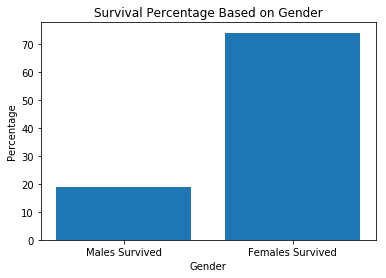

In [179]:
male_survived = 18.9
female_survived= 74.2
survived_percent = [male_survived, female_survived]

pos = [0, 1]
plt.bar(pos, survived_percent, align="center")
plt.title("Survival Percentage Based on Gender")
plt.ylabel("Percentage")
plt.xlabel("Gender")
plt.xticks(pos, ["Males Survived", "Females Survived"])
plt.show()

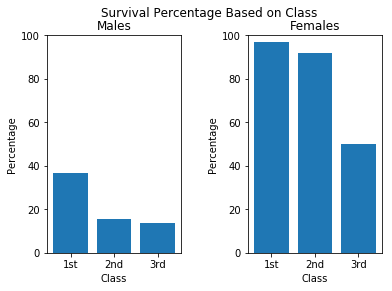

In [212]:
male_class_survived = [36.88, 15.74, 13.54]
female_class_survived = [96.8, 92.1, 50.0] # calculated with get_survival function separately

pos = range(len(male_class_survived))
posValues = ["1st", "2nd", "3rd"]

fig, a = plt.subplots(1, 2)
fig.suptitle("Survival Percentage Based on Class")

a[0].bar(pos, male_class_survived, align="center")
a[0].set_title("Males")

a[1].bar(pos, female_class_survived, align="center")
a[1].set_title("Females")

for a in a.flat:
    a.set(xlabel="Class", ylabel="Percentage", xticks=pos, xticklabels=posValues)
    a.set_ylim([0, 100])
    
plt.subplots_adjust(wspace=0.5)
plt.show()

In [219]:
index = fields["Age"]
age = data_numpy[1:, index]
age[age==''] = np.nan
age = age.astype(float)

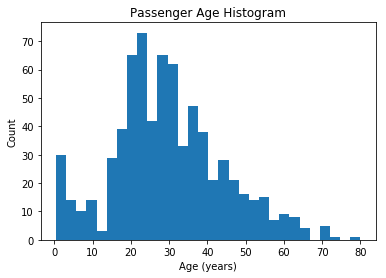

In [223]:
plt.hist(age[np.isnan(age)==0], bins=30)
plt.title("Passenger Age Histogram")
plt.xlabel("Age (years)")
plt.ylabel("Count")
plt.show()

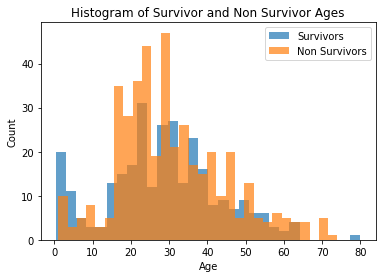

In [268]:
agesOfSurvivors = data_numpy[1:, fields["Age"]][np.where(data_numpy[1:, fields["Survived"]] == '1')[0]]
agesOfNonSurvivors = data_numpy[1:, fields["Age"]][np.where(data_numpy[1:, fields["Survived"]] == '0')[0]]
agesOfSurvivors = agesOfSurvivors.astype(float)
agesOfNonSurvivors = agesOfNonSurvivors.astype(float)


plt.hist(agesOfSurvivors[~np.isnan(agesOfSurvivors)], bins=30, alpha=0.7, label="Survivors")
plt.hist(agesOfNonSurvivors[~np.isnan(agesOfNonSurvivors)], bins=30, alpha=0.7, label="Non Survivors")
plt.title("Histogram of Survivor and Non Survivor Ages")
plt.legend(loc="upper right")
plt.ylabel("Count")
plt.xlabel("Age")
plt.show()

In [275]:
class Titanic_Data:
    def __init__(self ,Filename):
        with open(Filename, 'r') as csvfile:
            data_reader = csv.reader(csvfile)
            data_orig = []
            for row in data_reader:
                data_orig.append(row)
             
        fields = {}
        for i in range(len(data_orig[0])):
            fields[data_orig[0][i]] = i
            
        self.data = np.array(data_orig[1:])
        self.fields = fields
        
    def get_survival(self, characteristics):
        indices = set()
        for i in range(len(characteristics)):
            field = characteristic[i][0]
            val = characteristic[i][1]
            new_indices = set(list(np.where(self.data[0:, self.fields[field]] == val)[0]))
            
            if len(indices == 0):
                indices = new_indices
            else:
                indices &= new_indices
                
        indices_survived = set(list(np.where(self.data[0:, self.fields["Survived"]] == '1')[0]))
            
        return len(indicies_survived & indices)/len(indices)*100
    
    def clean_data(self):
        self.clean("Sex", ["male", "female"])
        self.clean("Embarked", ['C', 'Q', 'S'])
        self.clean("Age")
        self.clean("Pclass")
        self.clean("SibSp")
        self.clean("Parch")
        self.clean("Fare")
        
    def clean(self, col_header, values = []):
        column = self.data[:, self.fields[col_header]]
        column[column==''] = np.nan
        
        for i in range(len(values)):
            column[column==values[i]] = i
            
        self.data[:, self.fields[col_header]] = column
        
    def keep_columns(self, L):
        feature_data = self.data[:, L]
        feature_data = feature_data.astype(float)
        
        return feature_data                                           

In [280]:
titanic = Titanic_Data(file)
titanic.clean_data()

In [296]:
feature_data = titanic.keep_columns([1, 2, 4, 5, 6, 7, 9, 11])
feature_data[np.isnan(feature_data)] = -1

halfway = len(feature_data)//2
training_data = feature_data[0:halfway, 1:]
testing_data = feature_data[halfway:, 1:]

training_labels = feature_data[0:halfway, 0]
testing_labels = feature_data[halfway:,0]

In [302]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=5)
model.fit(training_data, training_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [306]:
passenger_ids = np.array([3, 194, 39, 1])
testcase_data = feature_data[passenger_ids-1, 1:]
testcase_predict = model.predict(testcase_data)
print("Predicted survival outcome: ", testcase_predict)

Predicted survival outcome:  [1. 1. 0. 0.]


In [310]:
print("Training Sample Labels: \t", training_labels[0:10])
sample_predict = model.predict(training_data[0:10, :])
print("Predicted Survival Outcome: \t", sample_predict)

Training Sample Labels: 	 [0. 1. 1. 1. 0. 0. 0. 0. 1. 1.]
Predicted Survival Outcome: 	 [0. 1. 1. 1. 0. 0. 0. 0. 1. 1.]


In [312]:
print("Testing Sample Labels: \t\t", testing_labels[0:10])
sample_predict = model.predict(testing_data[0:10, :])
print("Predicted Survival Outcome: \t", sample_predict)

Testing Sample Labels: 		 [1. 1. 1. 1. 1. 0. 0. 0. 1. 0.]
Predicted Survival Outcome: 	 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [314]:
testing_predicted = model.predict(testing_data)
score = round((1-sum(abs(testing_predicted-testing_labels))/len(testing_predicted))*100, 2)
print("Testing data performance ", score, "% correctly predicted")

Testing data performance  77.58 % correctly predicted


In [316]:
training_predicted = model.predict(training_data)
score = round((1-sum(abs(training_predicted-training_labels))/len(training_predicted))*100, 2)
print("Training data performance ", score, "% correctly predicted")

Training data performance  85.39 % correctly predicted


In [323]:
model = DecisionTreeClassifier(max_depth=15)
model.fit(training_data, training_labels)

testing_predicted = model.predict(testing_data)
score = round((1-sum(abs(testing_predicted-testing_labels))/len(testing_predicted))*100, 2)
print("DT Test: ", score)

DT Test:  76.68


In [324]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=250)
model.fit(training_data, training_labels)

testing_predicted = model.predict(testing_data)
score = round((1-sum(abs(testing_predicted-testing_labels))/len(testing_predicted))*100, 2)
print("RF Test: ", score)

RF Test:  79.82


In [325]:
from sklearn import svm
model = svm.SVC(gamma=2, C=1)
model.fit(training_data, training_labels)

testing_predicted = model.predict(testing_data)
score = round((1-sum(abs(testing_predicted-testing_labels))/len(testing_predicted))*100, 2)
print("SVM Test: ", score)

SVM Test:  61.43


In [326]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(training_data, training_labels)

testing_predicted = model.predict(testing_data)
sc0re = round((1-sum(abs(testing_predicted-testing_labels))/len(testing_predicted))*100, 2)
print("NB Test: ", score)

NB Test:  61.43


In [328]:
model = DecisionTreeClassifier(max_depth=15)
model.fit(training_data, training_labels)

test_jack = np.array([3, 0, 25, 0, 0, 7, 2])
test_rose = np.array([1, 1, 22, 1, 0, 50, 2])

testing_predicted = model.predict(test_jack.reshape(1, -1))
print("Jack Survival: ", testing_predicted)

testing_predicted = model.predict(test_rose.reshape(1, -1))
print("Rose Survival: ", testing_predicted)

Jack Survival:  [0.]
Rose Survival:  [1.]
